A little statistics

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import special

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
d = stats.norm.rvs(loc = 3.0, scale = .01, size = 100000)

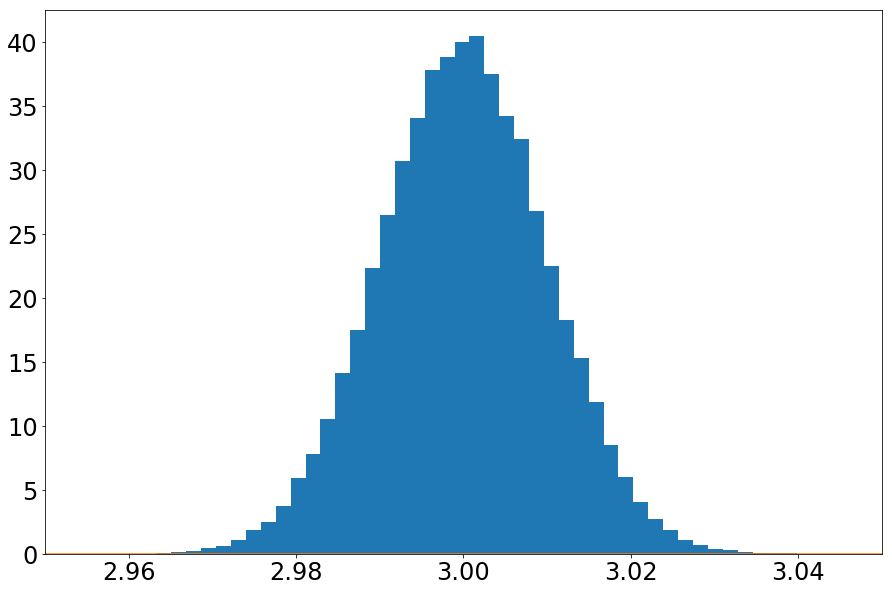

In [14]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([2.95,3.05])
x = np.linspace(2.95,3.05,1000)
ax.plot(x,special.erfc(x))
#ax.plot(x,stats.norm.ppf(x,loc = 3., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()


Non-continuous distributions